In [1]:
import matplotlib.pyplot as plt
from BigM import BigM
from BigM import graph
from BigM import InputHandling
import numpy as np
from scipy.optimize import linprog

/home/rikato/Code+Notes/MC_Lab/.venv/lib/python3.11/site-packages/BigM/simplex.py:73: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  iteration["operations"][pivot["position"]
/home/rikato/Code+Notes/MC_Lab/.venv/lib/python3.11/site-packages/B

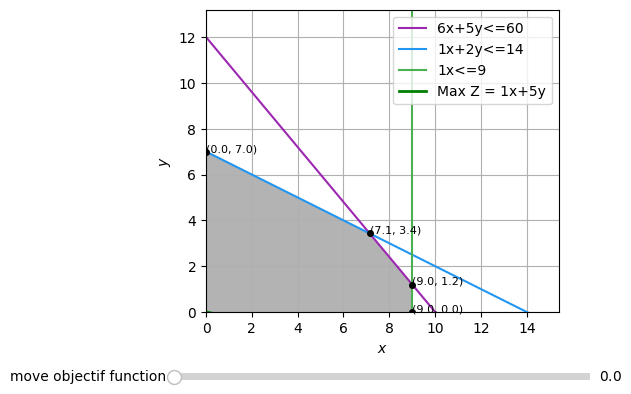

In [2]:
# BigM
lp = ["Max Z = x+5y","6x+5y<=60","x+2y<=14", "x<=9"]

bm = BigM.BigM()
formattedInput = np.array(InputHandling.formatUserInput(lp))

results = bm.runBigM(formattedInput)

graph.drawGraph(formattedInput, slider=True)

In [3]:
#Two phased
obj = [-5,3,4,-7]
lhs = [[1,1,1,1],
      [1,0,1,0],
      [2,1,1,0]]
rhs = [14,7,13]
bnd = [(0,float('inf')),(0,float('inf')),(0,float('inf')),(0,float('inf'))] #There are 4 bounds because 4 variables

optimize = linprog(c = obj,
                  A_ub = lhs,
                  b_ub = rhs,
                  bounds = bnd,
                  method = 'simplex')
optimize

/tmp/ipykernel_2139860/2849533839.py:9: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  optimize = linprog(c = obj,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -98.0
       x: [ 0.000e+00  0.000e+00  0.000e+00  1.400e+01]
     nit: 7